In [1]:
import torch

import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters
from torch import nn, optim

In [2]:
rcParams['figure.figsize'] = 14, 10
register_matplotlib_converters()

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

In [3]:
df = pd.read_csv('https://api.covid19india.org/csv/latest/state_wise_daily.csv')
df

,Date,Status,TT,AN,AP,AR,AS,BR,CH,CT,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,Confirmed,81,0,1,0,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
1,14-Mar-20,Recovered,9,0,0,0,0,0,0,0,...,0,1,0,0,0,0,4,0,0,0
2,14-Mar-20,Deceased,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15-Mar-20,Confirmed,27,0,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
4,15-Mar-20,Recovered,4,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,08-Aug-20,Recovered,52135,75,9151,104,1782,2408,52,263,...,820,968,11,5043,1091,224,2999,232,2064,0
443,08-Aug-20,Deceased,875,1,97,0,8,19,1,3,...,23,11,0,118,14,1,47,5,51,0
444,09-Aug-20,Confirmed,62117,139,10820,38,1123,3934,89,293,...,975,1169,6,5994,1982,147,4571,230,2939,0
445,09-Aug-20,Recovered,54474,148,9097,52,1734,2642,32,227,...,459,1072,80,6020,1669,92,2817,171,1996,0


In [4]:
confirmed_df = df[df.Status == "Confirmed"]
confirmed_df = confirmed_df.reset_index(drop = True)
confirmed_df

,Date,Status,TT,AN,AP,AR,AS,BR,CH,CT,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,Confirmed,81,0,1,0,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
1,15-Mar-20,Confirmed,27,0,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
2,16-Mar-20,Confirmed,15,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,17-Mar-20,Confirmed,11,0,0,0,0,0,0,0,...,0,0,0,0,1,0,2,0,1,0
4,18-Mar-20,Confirmed,37,0,0,0,0,0,0,0,...,1,3,0,1,8,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,05-Aug-20,Confirmed,56626,99,10128,65,2284,2701,64,295,...,841,1166,17,5175,2012,122,4078,246,2816,0
145,06-Aug-20,Confirmed,62170,96,10328,93,2372,3416,57,523,...,1035,1151,29,5684,2092,98,4586,369,2954,0
146,07-Aug-20,Confirmed,61455,99,10171,101,2679,3646,47,388,...,1039,1161,25,5880,2207,128,4404,278,2912,0
147,08-Aug-20,Confirmed,65156,129,10080,68,2218,3992,52,447,...,998,1171,6,5883,2256,146,4660,501,2949,0


In [5]:
recovered_df = df[df.Status == "Recovered"]
deceased_df = df[df.Status == "Deceased"]

In [6]:
confirmed_df = confirmed_df.drop("Status", axis = 1)


In [7]:
daily_conf_cases = confirmed_df.iloc[0:,1]
daily_conf_cases.index = pd.to_datetime(confirmed_df['Date'])
daily_conf_cases.head()


Date
2020-03-14    81
2020-03-15    27
2020-03-16    15
2020-03-17    11
2020-03-18    37
Name: TT, dtype: int64

(149,)

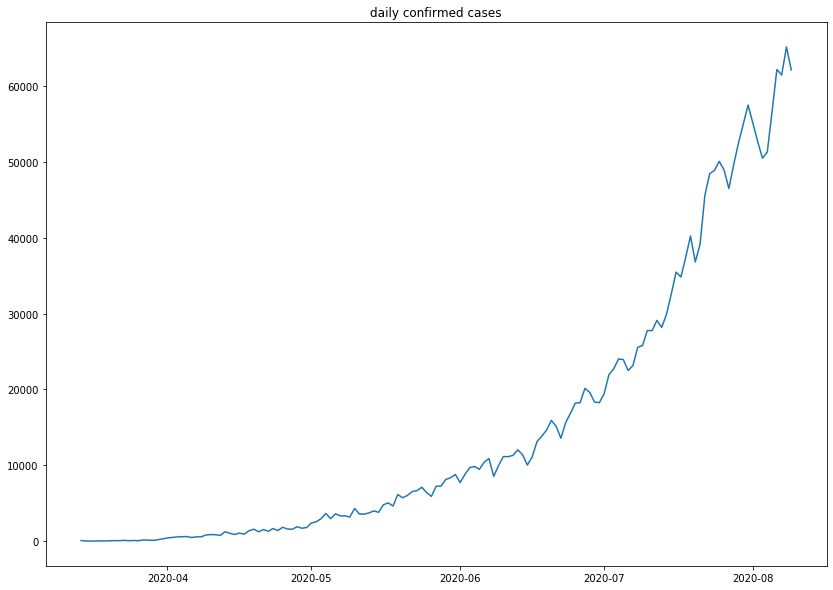

In [8]:
plt.plot(daily_conf_cases)
plt.title("daily confirmed cases");
daily_conf_cases.shape

In [9]:
test_data_size = 40

train_data = daily_conf_cases[:-test_data_size]
test_data = daily_conf_cases[-test_data_size:]
print(train_data.shape)
print(test_data.shape)

(109,)
(40,)


In [10]:
scaler = MinMaxScaler()
scaler = scaler.fit(train_data[:, np.newaxis])
train_data = scaler.transform(train_data[:, np.newaxis])
test_data = scaler.transform(test_data[:, np.newaxis])
print(train_data[:5])
print(test_data[:5])

[[0.00347722]
 [0.00079479]
 [0.0001987 ]
 [0.        ]
 [0.00129154]]
[[0.96458199]
 [1.08966271]
 [1.12796185]
 [1.19253887]
 [1.1887636 ]]


In [11]:
def create_seq(data, seq_len):
    x = []
    y = []
    for i in range(len(data)-seq_len-1):
        x1 = data[i:(i+seq_len)]
        y1 = data[i+seq_len]
        x.append(x1)
        y.append(y1)
    return np.array(x), np.array(y)

In [12]:
seq_len = 5
xtrain, ytrain = create_seq(train_data, seq_len)
xtest, ytest = create_seq(test_data, seq_len)
xtrain = torch.from_numpy(xtrain).float()
ytrain = torch.from_numpy(ytrain).float()
xtest = torch.from_numpy(xtest).float()
ytest = torch.from_numpy(ytest).float()

In [13]:
print(xtrain.shape)
print(xtrain[:2])

torch.Size([103, 5, 1])
tensor([[[0.0035],
         [0.0008],
         [0.0002],
         [0.0000],
         [0.0013]],

        [[0.0008],
         [0.0002],
         [0.0000],
         [0.0013],
         [0.0008]]])


In [14]:
print(ytrain.shape)
print(ytrain[:2])

torch.Size([103, 1])
tensor([[0.0008],
        [0.0023]])


In [15]:
train_data[:10]

array([[0.00347722],
       [0.00079479],
       [0.0001987 ],
       [0.        ],
       [0.00129154],
       [0.00079479],
       [0.00233471],
       [0.0033282 ],
       [0.00278178],
       [0.00452039]])

In [16]:
class CoronaVirusPredictor(nn.Module):

  def __init__(self, n_features, n_hidden, seq_len, n_layers=2):
    super(CoronaVirusPredictor, self).__init__()

    self.n_hidden = n_hidden
    self.seq_len = seq_len
    self.n_layers = n_layers

    self.lstm = nn.LSTM(
      input_size=n_features,
      hidden_size=n_hidden,
      num_layers=n_layers,
      dropout=0.5
    )

    self.linear = nn.Linear(in_features=n_hidden, out_features=1)

  def reset_hidden_state(self):
    self.hidden = (
        torch.zeros(self.n_layers, self.seq_len, self.n_hidden),
        torch.zeros(self.n_layers, self.seq_len, self.n_hidden)
    )

  def forward(self, sequences):
    lstm_out, self.hidden = self.lstm(
      sequences.view(len(sequences), self.seq_len, -1),
      self.hidden
    )
    last_time_step = \
      lstm_out.view(self.seq_len, len(sequences), self.n_hidden)[-1]
    y_pred = self.linear(last_time_step)
    return y_pred

In [17]:
def train_model(
  model, 
  train_data, 
  train_labels, 
  test_data=None, 
  test_labels=None
):
  loss_fn = torch.nn.MSELoss(reduction='sum')

  optimiser = torch.optim.Adam(model.parameters(), lr=1e-3)
  num_epochs = 100

  train_hist = np.zeros(num_epochs)
  test_hist = np.zeros(num_epochs)

  for t in range(num_epochs):
    model.reset_hidden_state()

    y_pred = model(xtrain)

    loss = loss_fn(y_pred.float(), ytrain)

    if test_data is not None:
      with torch.no_grad():
        y_test_pred = model(xtest)
        test_loss = loss_fn(y_test_pred.float(), ytest)
      test_hist[t] = test_loss.item()

      if t % 10 == 0:  
        print(f'Epoch {t} train loss: {loss.item()} test loss: {test_loss.item()}')
    elif t % 10 == 0:
      print(f'Epoch {t} train loss: {loss.item()}')

    train_hist[t] = loss.item()
    
    optimiser.zero_grad()

    loss.backward()

    optimiser.step()
  
  return model.eval(), train_hist, test_hist

In [34]:
model = CoronaVirusPredictor(
  n_features=1, 
  n_hidden=512, 
  seq_len=seq_len, 
  n_layers=3
)
model, train_hist, test_hist = train_model(
  model, 
  xtrain, 
  ytrain, 
  xtest, 
  ytest
)

Epoch 0 train loss: 13.41720962524414 test loss: 161.3935089111328
Epoch 10 train loss: 7.509164333343506 test loss: 127.13613891601562
Epoch 20 train loss: 5.838303089141846 test loss: 15.931055068969727
Epoch 30 train loss: 0.8257293701171875 test loss: 85.43160247802734
Epoch 40 train loss: 0.8172898292541504 test loss: 131.91294860839844
Epoch 50 train loss: 0.7103055715560913 test loss: 82.33338928222656
Epoch 60 train loss: 0.6043803095817566 test loss: 55.31303787231445
Epoch 70 train loss: 0.5396303534507751 test loss: 48.530452728271484
Epoch 80 train loss: 0.6472642421722412 test loss: 38.04363250732422
Epoch 90 train loss: 0.6752868890762329 test loss: 25.945119857788086


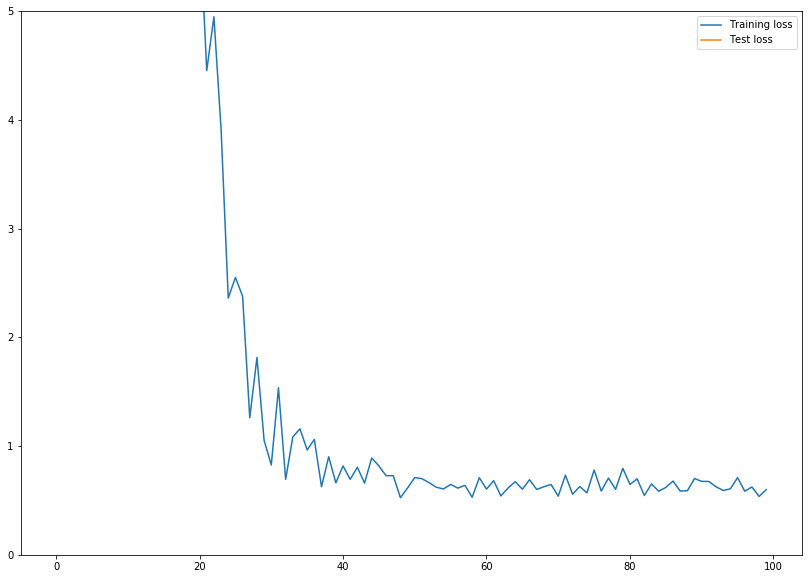

In [35]:
plt.plot(train_hist, label="Training loss")
plt.plot(test_hist, label="Test loss")
plt.ylim((0, 5))
plt.legend();

In [36]:
with torch.no_grad():
  test_seq = xtest[:1]
  preds = []
  for _ in range(len(xtest)):
    y_test_pred = model(test_seq)
    pred = torch.flatten(y_test_pred).item()
    preds.append(pred)
    new_seq = test_seq.numpy().flatten()
    new_seq = np.append(new_seq, [pred])
    new_seq = new_seq[1:]
    test_seq = torch.as_tensor(new_seq).view(1, seq_len, 1).float()

In [37]:
true_cases = scaler.inverse_transform(
    np.expand_dims(ytest.flatten().numpy(), axis=0)
).flatten()

predicted_cases = scaler.inverse_transform(
  np.expand_dims(preds, axis=0)
).flatten()

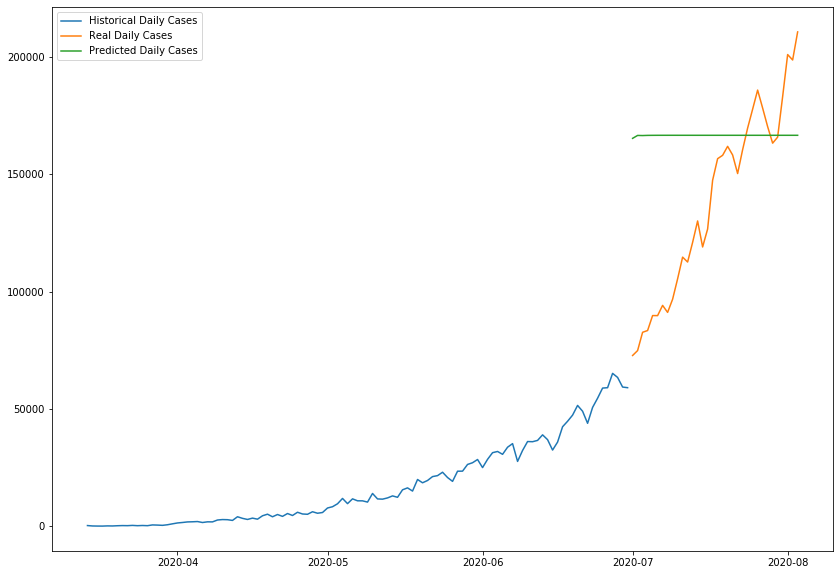

In [38]:
plt.plot(
  daily_conf_cases.index[:len(train_data)], 
  scaler.inverse_transform(train_data).flatten(),
  label='Historical Daily Cases'
)

plt.plot(
  daily_conf_cases.index[len(train_data):len(train_data) + len(true_cases)], 
  true_cases,
  label='Real Daily Cases'
)

plt.plot(
  daily_conf_cases.index[len(train_data):len(train_data) + len(true_cases)], 
  predicted_cases, 
  label='Predicted Daily Cases'
)

plt.legend();

In [39]:
scaler = MinMaxScaler()

scaler = scaler.fit(np.expand_dims(daily_conf_cases, axis=1))

all_data = scaler.transform(np.expand_dims(daily_conf_cases, axis=1))

all_data.shape

(149, 1)

In [40]:
X_all, y_all = create_seq(all_data, seq_len)

X_all = torch.from_numpy(X_all).float()
y_all = torch.from_numpy(y_all).float()

model = CoronaVirusPredictor(
  n_features=1, 
  n_hidden=512, 
  seq_len=seq_len, 
  n_layers=2
)
model, train_hist, _ = train_model(model, X_all, y_all)

Epoch 0 train loss: 15.836956024169922
Epoch 10 train loss: 7.24441385269165
Epoch 20 train loss: 5.181619644165039
Epoch 30 train loss: 2.694866180419922
Epoch 40 train loss: 1.9646142721176147
Epoch 50 train loss: 0.7690610289573669
Epoch 60 train loss: 0.588944673538208
Epoch 70 train loss: 0.5901067852973938
Epoch 80 train loss: 0.5979685187339783
Epoch 90 train loss: 0.5840333104133606


In [41]:
DAYS_TO_PREDICT = 50
with torch.no_grad():
  test_seq = X_all[:1]
  preds = []
  for _ in range(DAYS_TO_PREDICT):
    y_test_pred = model(test_seq)
    pred = torch.flatten(y_test_pred).item()
    preds.append(pred)
    new_seq = test_seq.numpy().flatten()
    new_seq = np.append(new_seq, [pred])
    new_seq = new_seq[1:]
    test_seq = torch.as_tensor(new_seq).view(1, seq_len, 1).float()

In [42]:
predicted_cases = scaler.inverse_transform(
  np.expand_dims(preds, axis=0)
).flatten()

In [43]:
daily_conf_cases.index[-1]

Timestamp('2020-08-09 00:00:00')

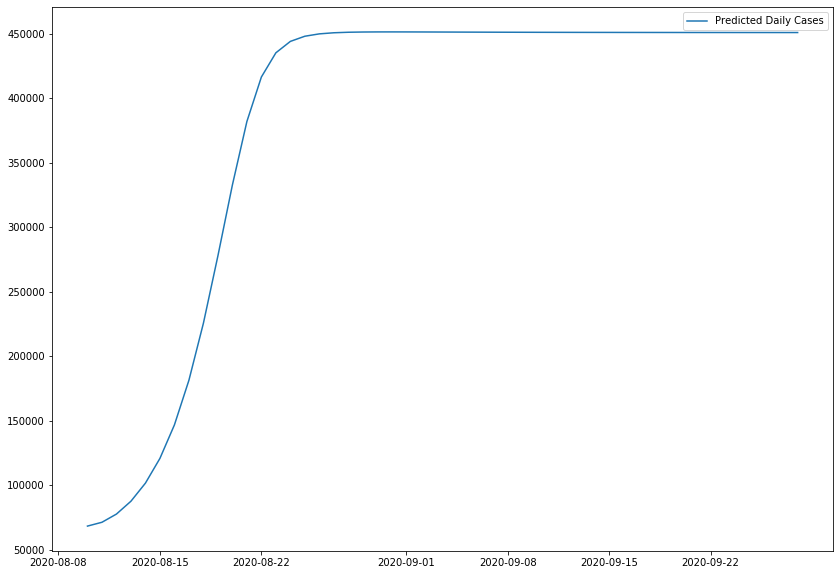

In [44]:
predicted_index = pd.date_range(
  start=daily_conf_cases.index[-1],
  periods=DAYS_TO_PREDICT + 1,
  closed='right'
)

predicted_cases = pd.Series(
  data=predicted_cases,
  index=predicted_index
)

plt.plot(predicted_cases, label='Predicted Daily Cases')
plt.legend();

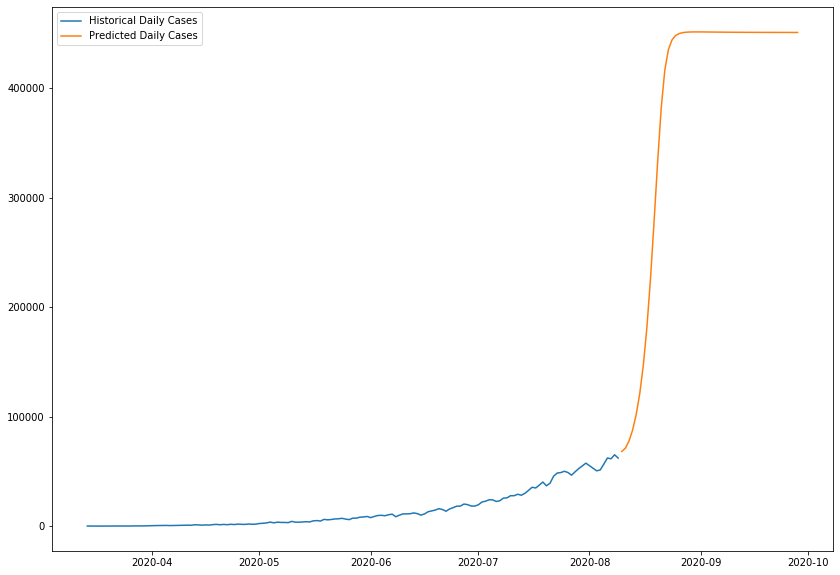

In [45]:
plt.plot(daily_conf_cases, label='Historical Daily Cases')
plt.plot(predicted_cases, label='Predicted Daily Cases')
plt.legend();